<a href="https://colab.research.google.com/github/Heena-There/PG_Diploma-Project--Predictive-Analysis-for-Travel-Insurance/blob/main/Predictive_Analysis_of_Travel_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the data

In [ ]:

file_path = '/content/TravelInsurancePrediction_Dataset.csv'
data = pd.read_csv(file_path)

# Step 2: Understand the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  101000 non-null  float64
 1   Employment Type      101000 non-null  object 
 2   GraduateOrNot        101000 non-null  object 
 3   AnnualIncome         101000 non-null  float64
 4   FamilyMembers        101000 non-null  float64
 5   ChronicDiseases      101000 non-null  float64
 6   FrequentFlyer        101000 non-null  object 
 7   EverTravelledAbroad  101000 non-null  object 
 8   TravelInsurance      101000 non-null  float64
dtypes: float64(5), object(4)
memory usage: 6.9+ MB


In [ ]:
print(data.head())

         Age               Employment Type GraduateOrNot  AnnualIncome  \
0  30.999900             Government Sector           Yes  9.000000e+05   
1  25.990394             Government Sector           Yes  1.300000e+06   
2  33.992974             Government Sector           Yes  1.300000e+06   
3  33.000537             Government Sector           Yes  4.000000e+05   
4  32.001252  Private Sector/Self Employed           Yes  3.500000e+05   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0       3.003979         0.013118            No                  No   
1       5.004967        -0.007177           Yes                 Yes   
2       4.013509         1.004100            No                  No   
3       6.012644        -0.003509            No                  No   
4       2.997488         0.993146            No                  No   

   TravelInsurance  
0         0.005462  
1        -0.002154  
2        -0.019903  
3        -0.009334  
4         0.024896  


In [ ]:
data_shape = data.shape
print("Data Shape:", data_shape)

Data Shape: (101000, 9)


In [ ]:
# Convert all float columns to integer
float_columns = data.select_dtypes(include=['float64']).columns
data[float_columns] = data[float_columns].astype(int)

# Check the data types of the columns after conversion
print("\nData types after converting all float columns to integers:")
print(data.dtypes)


Data types after converting all float columns to integers:
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object


In [ ]:
data_types = data.dtypes
print("\nData Types:\n", data.dtypes)


Data Types:
 Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object


In [ ]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


In [ ]:
data_summary = data.describe()
print("\nData Summary:\n", data.describe())


Data Summary:
                  Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  101000.000000  1.010000e+05  101000.000000    101000.000000   
mean       29.262604  9.328520e+05       4.393891         0.170069   
std         2.954213  3.608964e+05       1.828206         0.375696   
min        24.000000  2.999990e+05       1.000000         0.000000   
25%        27.000000  6.000000e+05       3.000000         0.000000   
50%        29.000000  9.000000e+05       4.000000         0.000000   
75%        32.000000  1.200000e+06       6.000000         0.000000   
max        35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count    101000.000000  
mean          0.195168  
std           0.396332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000  


In [ ]:
# Check Numerical dataframe statistics
data.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,101000.0,29.262604,2.954213,24.0,27.0,29.0,32.0,35.0
AnnualIncome,101000.0,932851.978030,360896.399254,299999.0,600000.0,900000.0,1200000.0,1800000.0
FamilyMembers,101000.0,4.393891,1.828206,1.0,3.0,4.0,6.0,9.0
ChronicDiseases,101000.0,0.170069,0.375696,0.0,0.0,0.0,0.0,1.0
TravelInsurance,101000.0,0.195168,0.396332,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Check Object-type datafram statistics
data.describe(include = 'object').T

,count,unique,top,freq
Employment Type,101000,2,Private Sector/Self Employed,70604
GraduateOrNot,101000,2,Yes,84749
FrequentFlyer,101000,2,No,77141
EverTravelledAbroad,101000,2,No,81163


In [ ]:
data_head = data.head()
print("\nFirst 5 Rows of Data:\n", data.head())


First 5 Rows of Data:
    Age               Employment Type GraduateOrNot  AnnualIncome  \
0   30             Government Sector           Yes        899999   
1   25             Government Sector           Yes       1300000   
2   33             Government Sector           Yes       1300000   
3   33             Government Sector           Yes        399999   
4   32  Private Sector/Self Employed           Yes        350000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              3                0            No                  No   
1              5                0           Yes                 Yes   
2              4                1            No                  No   
3              6                0            No                  No   
4              2                0            No                  No   

   TravelInsurance  
0                0  
1                0  
2                0  
3                0  
4                0  


# Step 3: Data Cleaning

In [ ]:

# Check for duplicates
print("\nDuplicate Rows:", data.duplicated().sum())



Duplicate Rows: 63335


#Remove Repeated values

In [ ]:
# Drop duplicates if any
data = data.drop_duplicates()


In [ ]:
data_shape = data.shape
print("Data Shape:", data_shape)

Data Shape: (37665, 9)


In [ ]:
# Check Numerical dataframe statistics
data.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,37665.0,29.351945,3.001940,24.0,27.0,29.0,32.0,35.0
AnnualIncome,37665.0,963015.565007,376835.334605,299999.0,649999.0,949999.0,1299999.0,1800000.0
FamilyMembers,37665.0,4.510315,2.004113,1.0,3.0,4.0,6.0,9.0
ChronicDiseases,37665.0,0.263428,0.440498,0.0,0.0,0.0,1.0,1.0
TravelInsurance,37665.0,0.286181,0.451981,0.0,0.0,0.0,1.0,1.0


#Separate X & Y

In [ ]:
X = data.drop('TravelInsurance', axis=1)
Y = data['TravelInsurance']

In [ ]:
X.shape,Y.shape

((37665, 8), (37665,))

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7,stratify=Y)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((26365, 8), (11300, 8), (26365,), (11300,))

#Check Columns with single Value

In [ ]:
data.nunique()

,0
Age,12
Employment Type,2
GraduateOrNot,2
AnnualIncome,60
FamilyMembers,9
ChronicDiseases,2
FrequentFlyer,2
EverTravelledAbroad,2
TravelInsurance,2


#One hot encoding

In [ ]:
X_train.dtypes

,0
Age,int64
Employment Type,object
GraduateOrNot,object
AnnualIncome,int64
FamilyMembers,int64
ChronicDiseases,int64
FrequentFlyer,object
EverTravelledAbroad,object


In [ ]:
X_train_ohe = pd.get_dummies(X_train)
X_train.shape, X_train_ohe.shape

((26365, 8), (26365, 12))

In [ ]:
X_train_ohe.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'Employment Type_Government Sector',
       'Employment Type_Private Sector/Self Employed', 'GraduateOrNot_No',
       'GraduateOrNot_Yes', 'FrequentFlyer_No', 'FrequentFlyer_Yes',
       'EverTravelledAbroad_No', 'EverTravelledAbroad_Yes'],
      dtype='object')

In [ ]:
X_train_ohe.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
88930,28,500000,5,0,False,True,False,True,False,True,False,True
64120,32,350000,8,1,False,True,False,True,True,False,False,True
55197,29,1200000,6,1,False,True,False,True,True,False,True,False
21379,35,1099999,3,0,False,True,False,True,True,False,True,False
60322,28,499999,3,0,False,True,True,False,False,True,True,False


In [ ]:
X_test_ohe = pd.get_dummies(X_test)
X_test.shape, X_test_ohe.shape

((11300, 8), (11300, 12))

# Step 4: Univariate Analysis

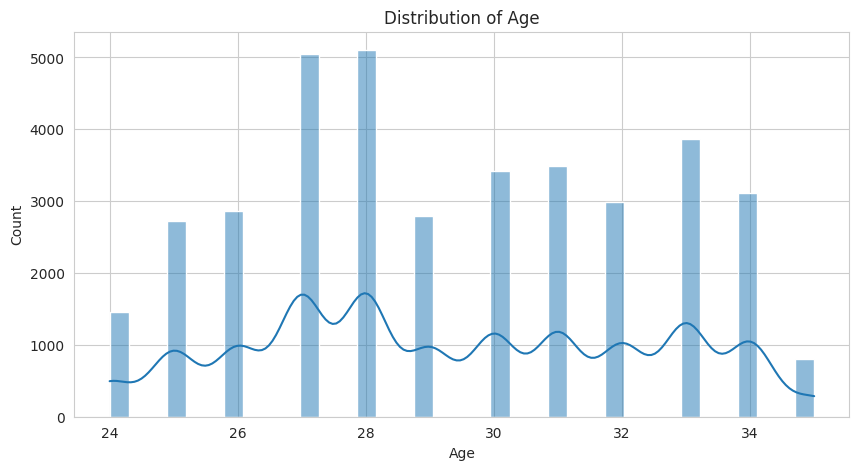

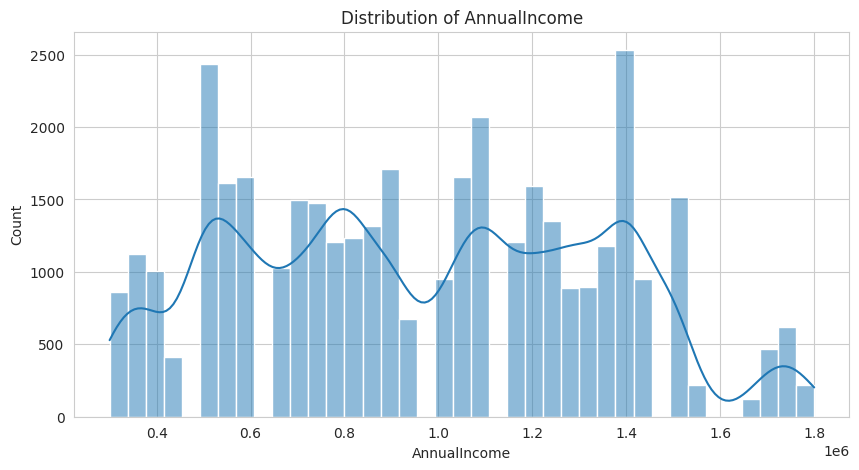

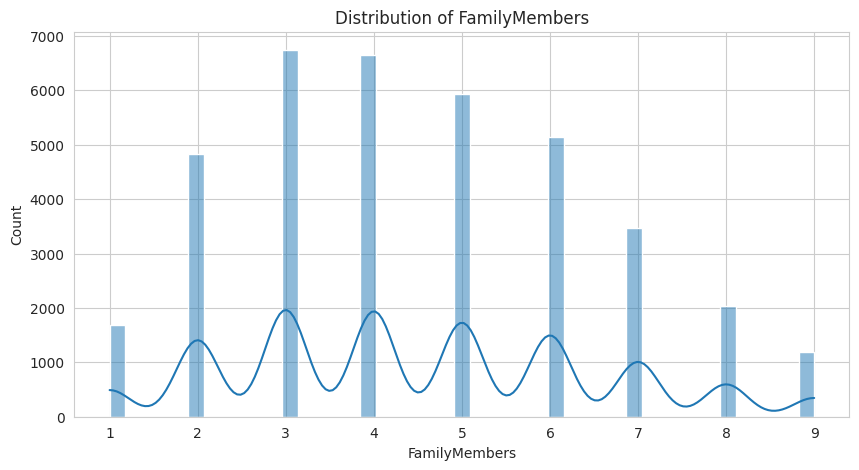

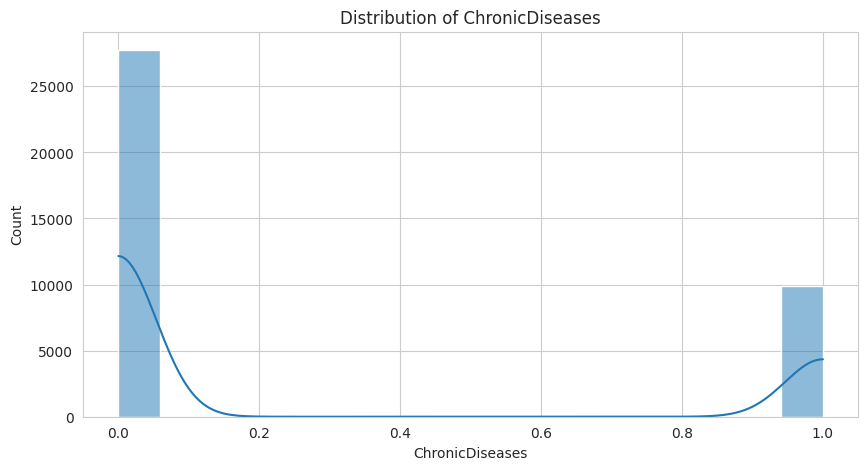

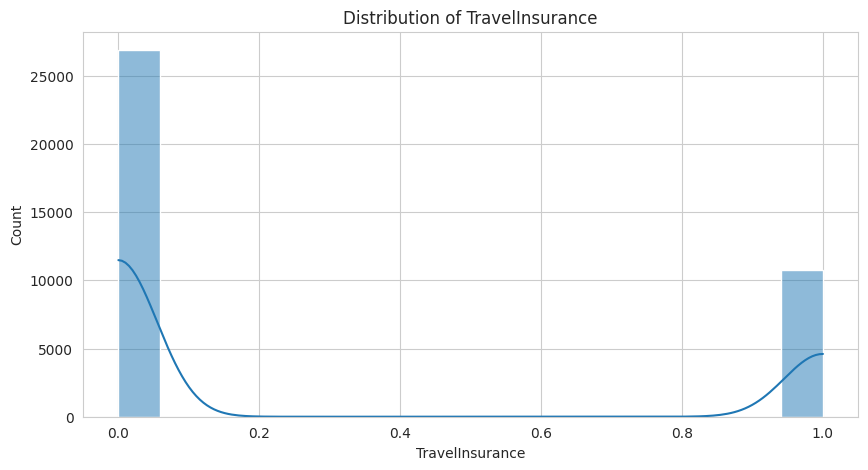

In [ ]:

# Distribution of numerical features
num_features = data.select_dtypes(include=[np.number]).columns
for feature in num_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Distribution of categorical features

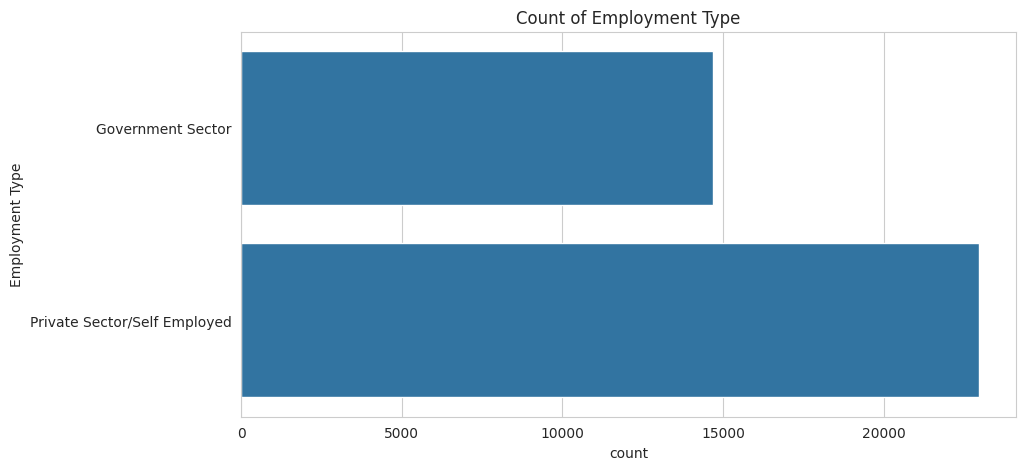

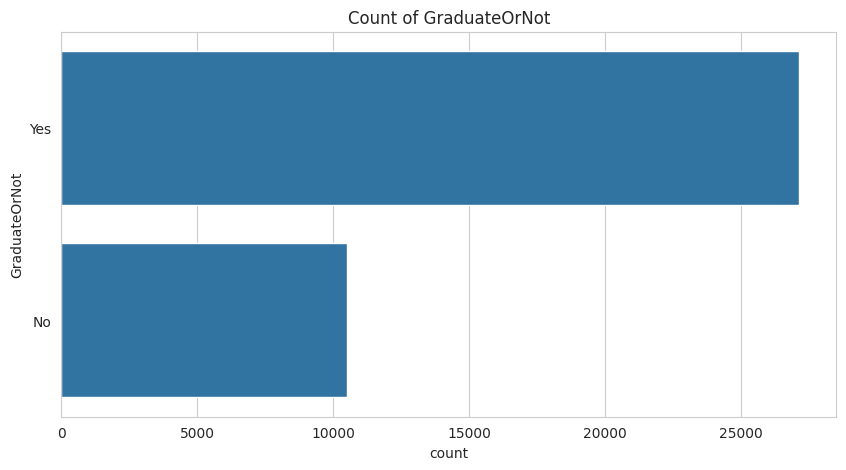

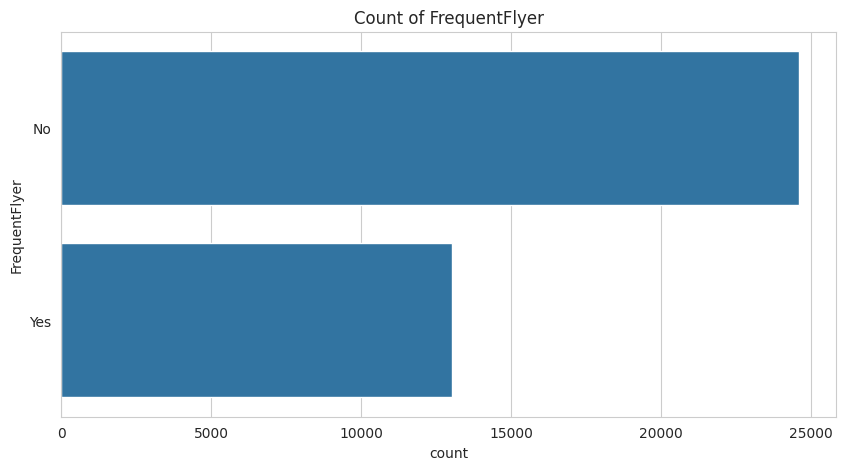

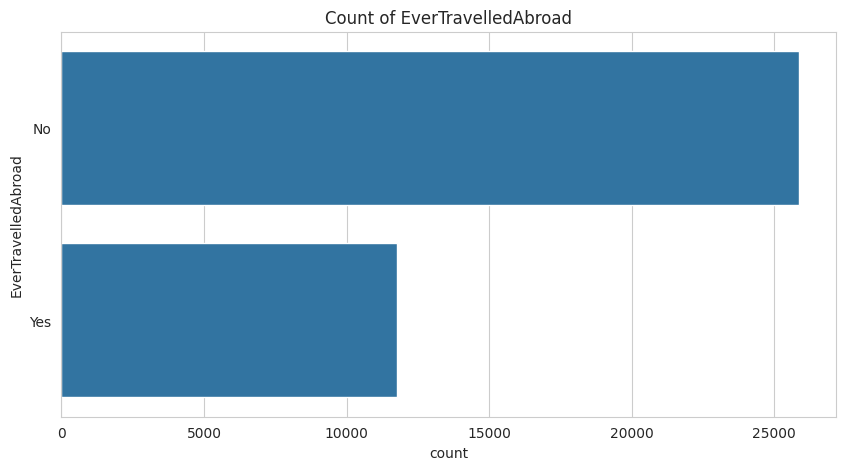

In [ ]:
cat_features = data.select_dtypes(include=[object]).columns
for feature in cat_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data[feature])
    plt.title(f'Count of {feature}')
    plt.show()

# Function to detect outliers using IQR

In [ ]:

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detecting outliers in numerical features

In [ ]:

num_features = data.select_dtypes(include=[np.number]).columns
for feature in num_features:
    outliers = detect_outliers_iqr(data, feature)
    print(f'Outliers detected in {feature}: {len(outliers)}')

Outliers detected in Age: 0
Outliers detected in AnnualIncome: 0
Outliers detected in FamilyMembers: 0
Outliers detected in ChronicDiseases: 0
Outliers detected in TravelInsurance: 0


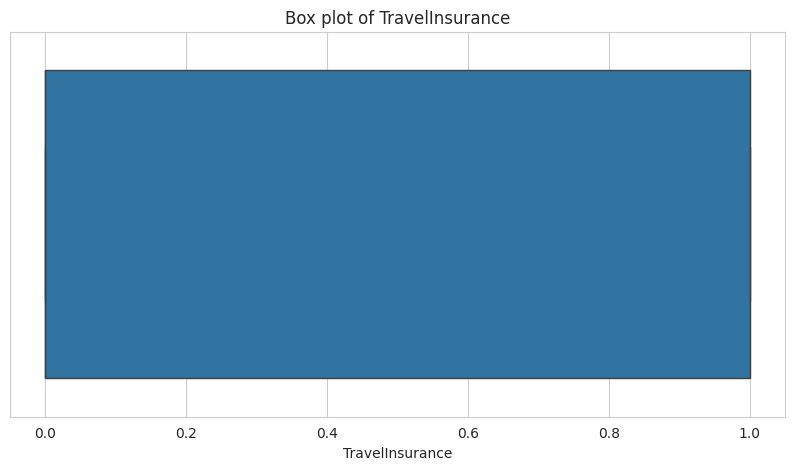

In [ ]:
# Visualize outliers using Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=data[feature])
plt.title(f'Box plot of {feature}')
plt.show()

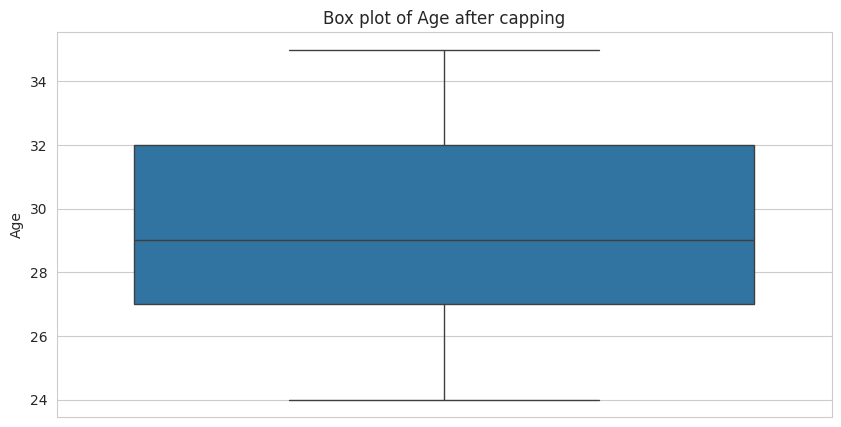

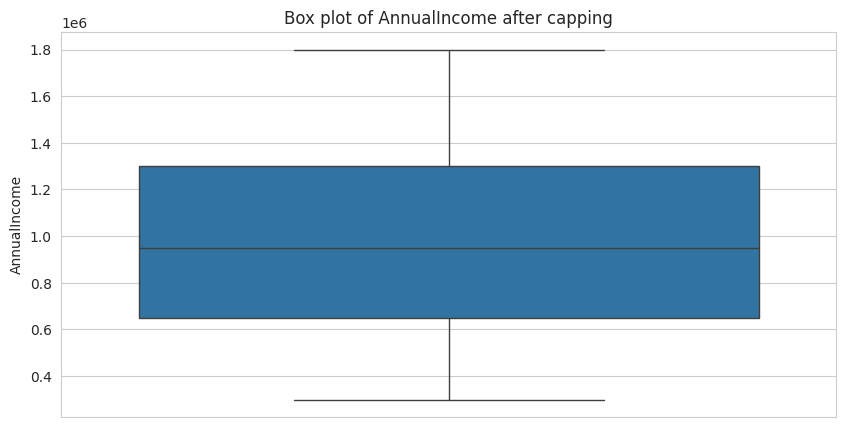

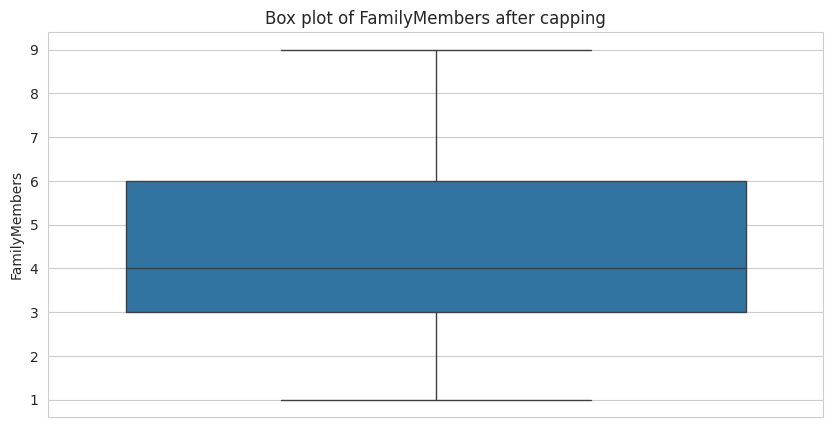

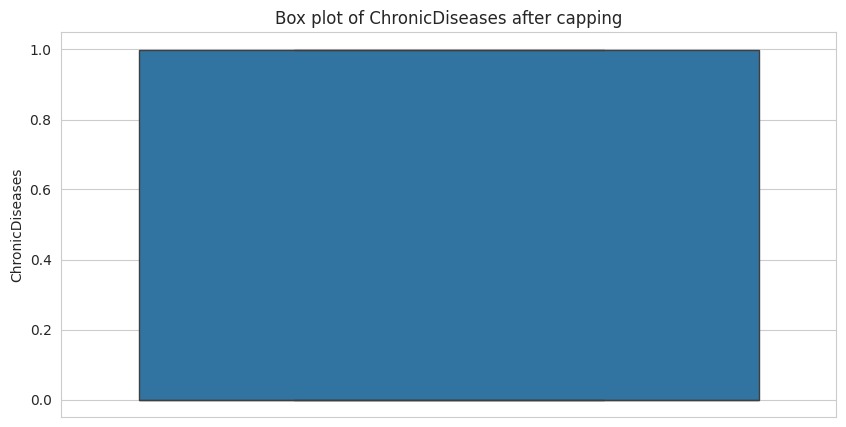

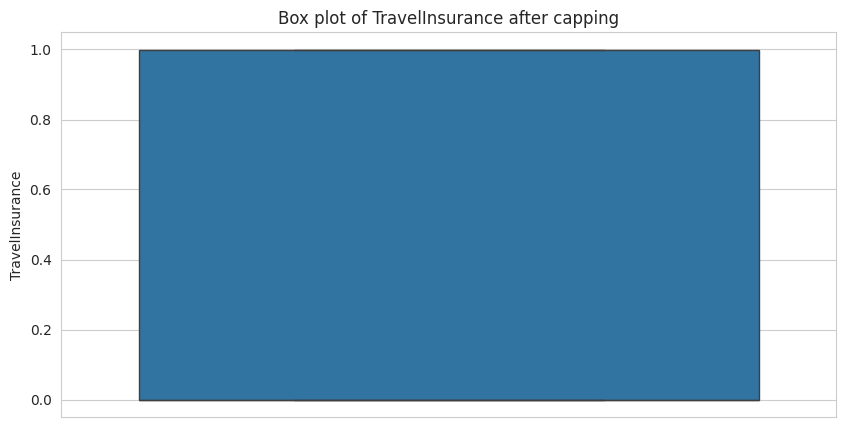

In [ ]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for feature in num_features:
    data = cap_outliers(data, feature)
    # Check the box plot after capping
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[feature])
    plt.title(f'Box plot of {feature} after capping')
    plt.show()

In [ ]:
# Calculate the z-scores for each numerical column
z_scores = np.abs((data.select_dtypes(include=np.number)) -
                  data.select_dtypes(include=np.number).mean()) / data.select_dtypes(include=np.number).std()

# Identify any values with z-score greater than 3
potential_outliers = data[(z_scores > 3).any(axis=1)]

# Print the potential outliers
print(potential_outliers)

Empty DataFrame
Columns: [Age, Employment Type, GraduateOrNot, AnnualIncome, FamilyMembers, ChronicDiseases, FrequentFlyer, EverTravelledAbroad, TravelInsurance]
Index: []


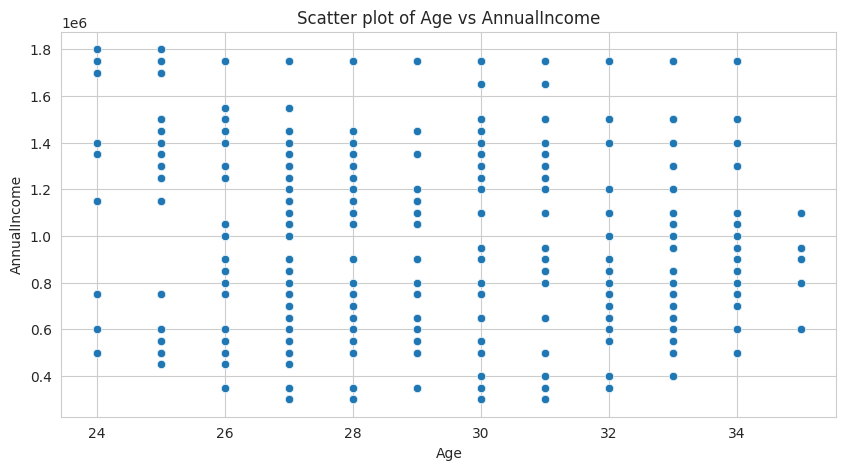

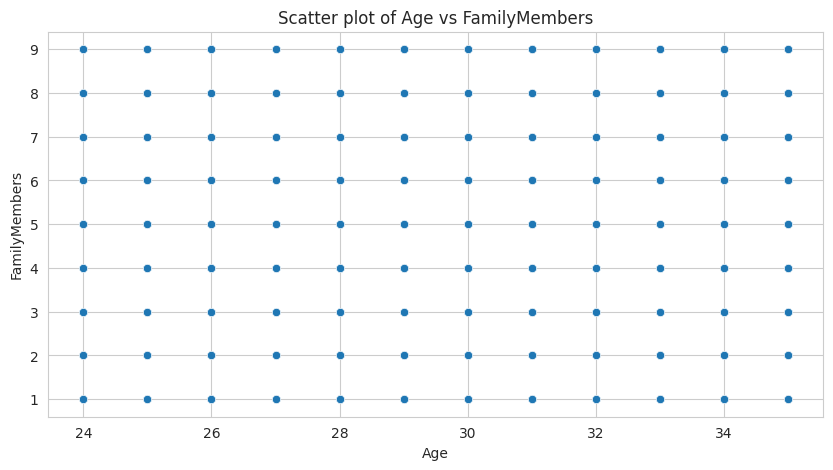

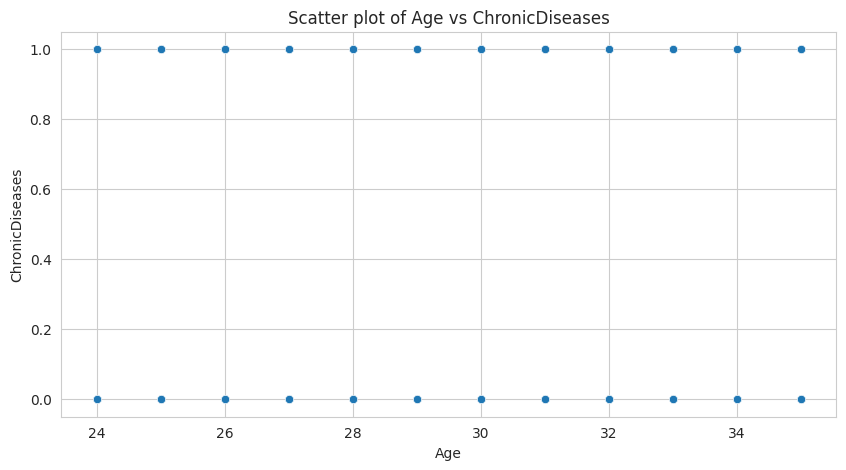

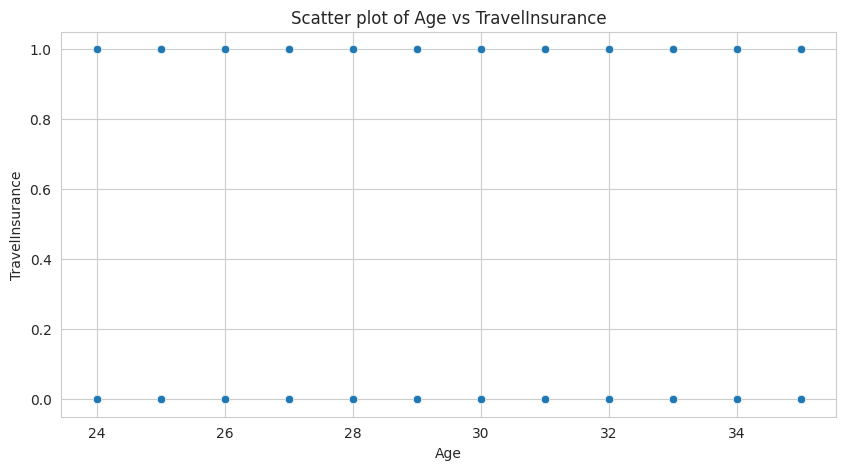

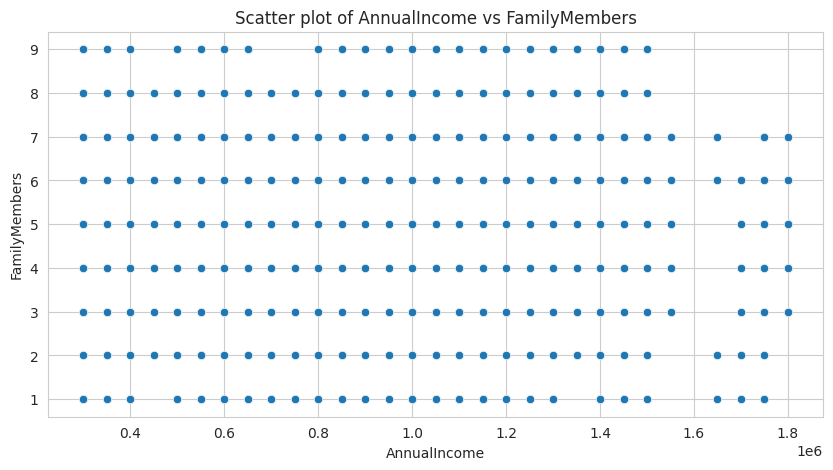

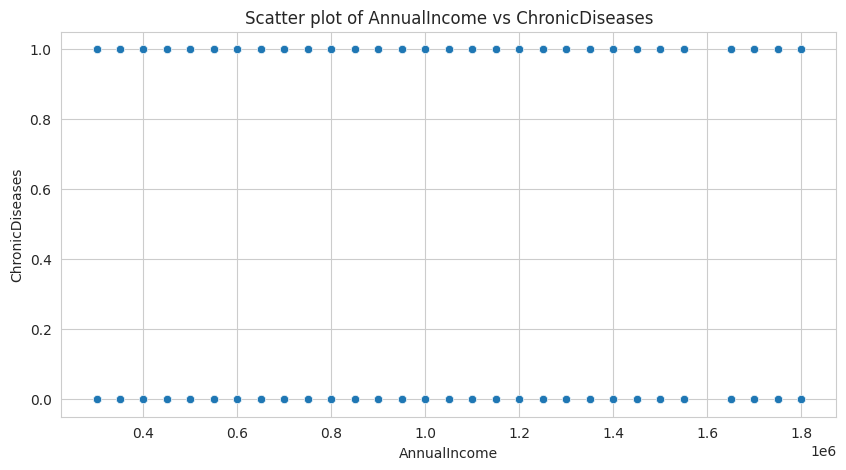

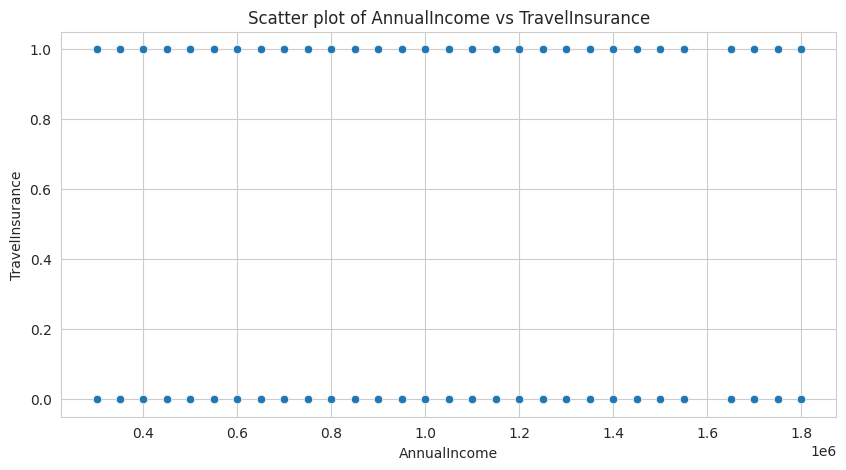

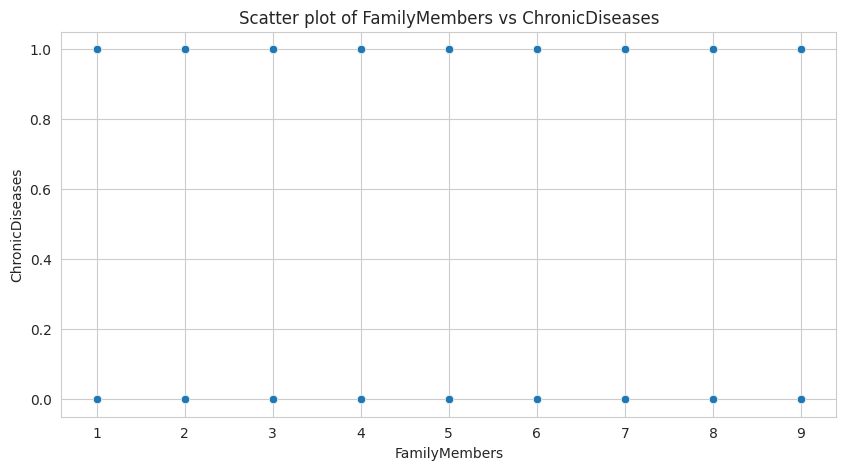

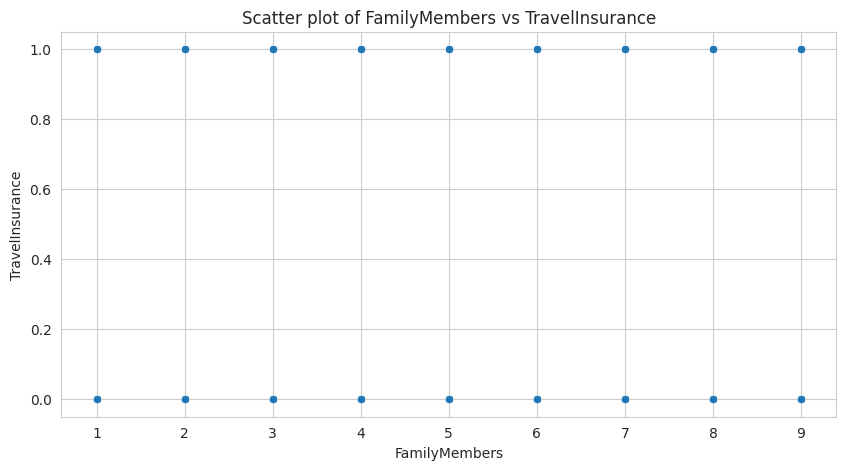

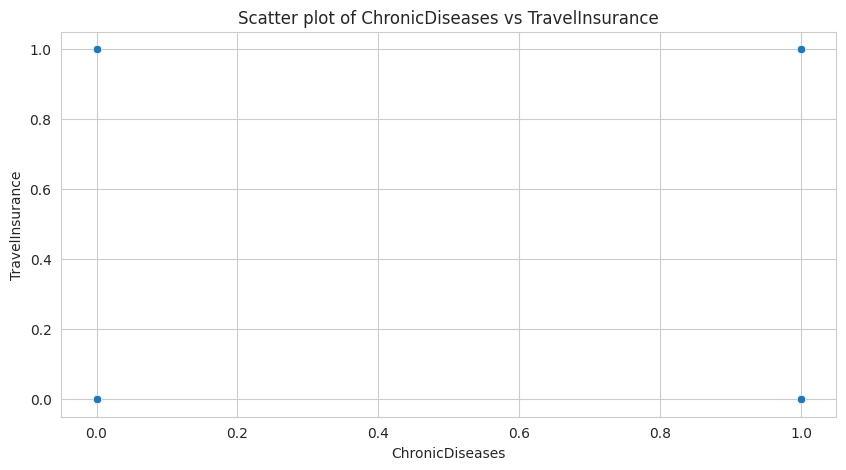

In [ ]:
# Create scatter plots for pairs of numerical features
for i in range(len(num_features)):
    for j in range(i + 1, len(num_features)):
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=data[num_features[i]], y=data[num_features[j]])
        plt.title(f'Scatter plot of {num_features[i]} vs {num_features[j]}')
        plt.xlabel(num_features[i])
        plt.ylabel(num_features[j])
        plt.show()

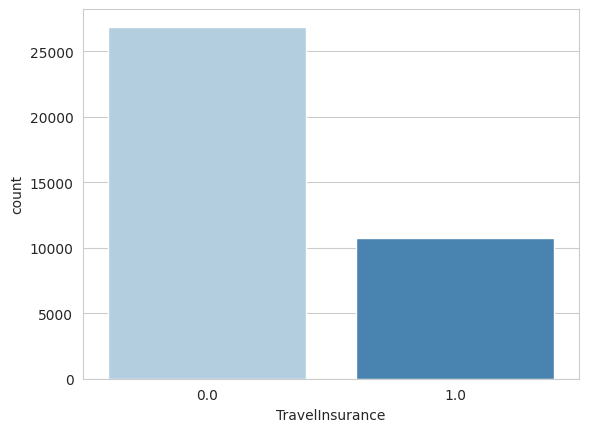

,TravelInsurance
TravelInsurance,
0.0,26886
1.0,10779


In [ ]:
# Visualize the distribution of the target variable

sns.countplot(data=data,x='TravelInsurance',palette="Blues")
plt.show()
data.groupby('TravelInsurance').agg({'TravelInsurance':'count'})

In [ ]:
# Visualize by travel insurance and count number of customers

labels = ['Not Purchased', 'Purchased']
values = data['TravelInsurance'].value_counts()

fig = px.pie( names=labels, values=values, color_discrete_sequence=['lightblue', 'lightpink'],
             title='How many people have purchased the insurance?', template='plotly_white')

fig.show()

#Classifications

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [ ]:
lr = LogisticRegression(class_weight='balanced',random_state = 7,solver = 'saga')
lr.fit(X_train_ohe,Y_train)
lr.coef_


array([[-1.20514974e-06,  1.07585978e-07, -1.36718978e-07,
        -3.02234022e-08, -3.09326117e-08, -1.26412280e-08,
        -3.52342333e-08, -8.33960639e-09, -1.34820775e-08,
        -3.00917621e-08, -1.15844720e-08, -3.19893677e-08]])

In [ ]:
Y_pred = lr.predict(X_test_ohe)
Y_test.shape,Y_pred.shape
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8066
           1       0.29      1.00      0.45      3234

    accuracy                           0.29     11300
   macro avg       0.14      0.50      0.22     11300
weighted avg       0.08      0.29      0.13     11300



In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search over
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_lr = GridSearchCV(lr, lr_params, cv=2, verbose = 2)
grid_lr.fit(X_train_ohe,Y_train)
lr_best = grid_lr.best_estimator_

# Print the best hyperparameters and score found during the grid search
print("Best parameters:", lr_best)
print("Best Accuracy Score: {:.2f}%".format(grid_lr.best_score_ * 100))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.5s
[CV] END ....................................C=1, penalty=l1; total time=   0.5s
[CV] END ....................................C=1, penalty=l2; total time=   0.4s
[CV] END ....................................C=1, penalty=l2; total time=   0.4s
[CV] END ...................................C=10, penalty=l1; total time=   0.5s
[CV] END ...................................C=10, penalty=l1; total time=   0.5s
[CV] END ...................................C=10, penalty=l2; total time=   0.4s
[CV] END ...................................C=10, penalty=l2; total time=   0.4s
[CV] END ..................................C=100, penalty=l1; total time=   0.8s
[CV] END ..................................C=100, penalty=l1; total time=   0.9s
[CV] END ..................................C=100, penalty=l2; total time=   0.7s
[CV] END ..................................C=100,

In [ ]:
svc1 = SVC(class_weight='balanced', random_state=7)
svc1.fit(X_train_ohe, Y_train)
Y_pred_svc = svc1.predict(X_test_ohe)
print("SVC Classification Report:\n",classification_report(Y_test,Y_pred_svc))

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      8066
           1       0.37      0.43      0.40      3234

    accuracy                           0.63     11300
   macro avg       0.56      0.57      0.56     11300
weighted avg       0.64      0.63      0.63     11300



In [ ]:
gnb =GaussianNB()
gnb.fit(X_train_ohe,Y_train)
Y_pred_gnb = gnb.predict(X_test_ohe)
print("GaussianNB Classification Report:\n",classification_report(Y_test,Y_pred_gnb))

GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      8066
           1       0.00      0.00      0.00      3234

    accuracy                           0.71     11300
   macro avg       0.36      0.50      0.42     11300
weighted avg       0.51      0.71      0.59     11300



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_ohe,Y_train)
Y_pred_mnb = mnb.predict(X_test_ohe)
print("MultinomialNB Classification Report:\n",classification_report(Y_test,Y_pred_mnb))

MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      8066
           1       0.38      0.43      0.40      3234

    accuracy                           0.64     11300
   macro avg       0.57      0.57      0.57     11300
weighted avg       0.65      0.64      0.64     11300



In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train_ohe,Y_train)
Y_pred_bnb = bnb.predict(X_test_ohe)
print("BernoulliNB Classification Report:\n",classification_report(Y_test,Y_pred_bnb))

BernoulliNB Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      8066
           1       0.00      0.00      0.00      3234

    accuracy                           0.71     11300
   macro avg       0.36      0.50      0.42     11300
weighted avg       0.51      0.71      0.59     11300



In [ ]:

knn = KNeighborsClassifier()
knn.fit(X_train_ohe,Y_train)
Y_pred_knn = knn.predict(X_test_ohe)
print("KNeighborsClassifier Classification Report:\n",classification_report(Y_test,Y_pred_knn))

KNeighborsClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76      8066
           1       0.33      0.24      0.28      3234

    accuracy                           0.64     11300
   macro avg       0.53      0.52      0.52     11300
weighted avg       0.61      0.64      0.62     11300



In [ ]:
# Define the hyperparameter grid to search over
knn_params = {'n_neighbors': range(1, 31)}

# Perform grid search cross-validation to find the best hyperparameters
grid_knn = GridSearchCV(knn, knn_params, cv=2)
grid_knn.fit(X_train_ohe, Y_train)
knn_best = grid_knn.best_estimator_

# Print the best hyperparameters and score found during the grid search
print("Best parameters:", knn_best)
print("Best Accuracy Score: {:.2f}%".format(grid_knn.best_score_ * 100))

Best parameters: KNeighborsClassifier(n_neighbors=30)
Best Accuracy Score: 70.71%


In [ ]:
rfc = RandomForestClassifier(max_samples= 0.8,oob_score = True,random_state=7)
rfc.fit(X_train_ohe,Y_train)
Y_pred_rfc = rfc.predict(X_test_ohe)
print("RandomForestClassifier Classification Report:\n",classification_report(Y_test,Y_pred_rfc))

RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70      8066
           1       0.17      0.14      0.16      3234

    accuracy                           0.56     11300
   macro avg       0.42      0.43      0.43     11300
weighted avg       0.53      0.56      0.54     11300



In [ ]:
# Define the hyperparameter grid to search over
rfc_params = {
    'n_estimators': [50, 200],
    'min_samples_split': [0.6,0.8]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_rfc = GridSearchCV(rfc, rfc_params, cv=2)
grid_rfc.fit(X_train_ohe,Y_train)
rfc_best = grid_rfc.best_estimator_

# Print the best hyperparameters and score found during the grid search
print("Best parameters:", rfc_best)
print("Best Accuracy Score: {:.2f}%".format(grid_rfc.best_score_ * 100))

Best parameters: RandomForestClassifier(max_samples=0.8, min_samples_split=0.6, n_estimators=50,
                       oob_score=True, random_state=7)
Best Accuracy Score: 71.38%


In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=7,class_weight= 'balanced')
dtc.fit(X_train_ohe,Y_train)
Y_pred_dtc = dtc.predict(X_test_ohe)
print("DecisionTreeClassifier Classification Report:\n",classification_report(Y_test,Y_pred_dtc))

DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63      8066
           1       0.21      0.27      0.23      3234

    accuracy                           0.50     11300
   macro avg       0.44      0.43      0.43     11300
weighted avg       0.54      0.50      0.52     11300



In [ ]:
# Define the hyperparameter grid to search over
dtc_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_dtc = GridSearchCV(dtc, dtc_params, cv=2)
grid_dtc.fit(X_train_ohe,Y_train)
dt_best = grid_dtc.best_estimator_

# Print the best hyperparameters and score found during the grid search
print("Best parameters:", dt_best)
print("Best Accuracy Score: {:.2f}%".format(grid_dtc.best_score_ * 100))

Best parameters: DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=7)
Best Accuracy Score: 68.91%
